### **SENTIMENTAL ANALYSIS**

Sentimental Analysis also known as opinion mining is the method of determining the emotional tone behind a piece of text. It involves checking whether a piece of text has a positive, negative or neutral tone.

It can be performed in various levels :
    
1. Document Level Sentiment ( Analyzing the sentiment of an entire Document )
2. Sentense Level Sentiment ( Analyzing the sentiment of individual Sentences )

The two main Libraries used in Sentimental analysis are :

- Natural Language Toolkit ( NLTK ) which is used for Natural Language Processing Tasks including tokenization, stemming, lemmatization, and sentiment analysis.
- TextBlob which is a simple Python library for processing textual data. It provides an easy-to-use interface for performing common natural language processing tasks, including sentiment analysis.

We will therefore perform a sentimental analysis on the product ID  in our data using VADER sentiment scoring and the Natural Languagr toolkit's Sentiment Intensity Analyzer.

This type of Sentimental Analysis is known as Entity Level Sentimental Analysis where it identifies sentiments expressed towards specific entities or targets mentioned in the text and in our case the entity is the product iD


In [6]:
 # importing necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm


In [7]:
df1 = pd.read_csv( 'CLEANED_DATA.csv' )
df2 = pd.read_csv( 'REVIEWERS_DATA.CSV')

In [8]:
 # Setting up the visualization style 
sns.set_style( style = 'darkgrid' )
sns.set_palette( palette = 'icefire' ) 

In [9]:
 # Getting the DataFrame with the review titles and the Product id 
Reviews_df = df1[['Product_ID','Reviews']]

display( Reviews_df.head() )

,Product_ID,Reviews
0,B019EGMGR0,Versatile and Comfortable – A Top Choice for G...
1,B01LWMWAXV,Finally we BOTH can sleep comfy!|Luxurious Com...
2,B07XFC3MF3,Product Design|**A Nighttime Revelation: The M...
3,B08YYVRXLM,Comfortable!|Not just for pregnancy|It’s cool ...
4,B07F946VMJ,You won’t be disappointed|Can't go wrong with ...


We can see the the dataframe has two columns , Product_ID and the Reviews we will therefore run the polarity score of the review content where we will add a progress bar to show the progress of the code. 

In [10]:
 # Creating a Sentiment Intensity Analyzer Object
sia = SentimentIntensityAnalyzer()

 # Creating a Dictonary of the output
res = {}

for i , row in tqdm( Reviews_df.iterrows() , total = len( Reviews_df ) ):
    review_desc = row[ 'Reviews' ]
    my_id = row[ 'Product_ID' ]

    res[my_id] = sia.polarity_scores( review_desc )

display( res )
    

  0%|          | 0/1009 [00:00<?, ?it/s]

{'B019EGMGR0': {'neg': 0.0, 'neu': 0.544, 'pos': 0.456, 'compound': 0.9503},
 'B01LWMWAXV': {'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'compound': 0.8507},
 'B07XFC3MF3': {'neg': 0.059, 'neu': 0.682, 'pos': 0.26, 'compound': 0.8164},
 'B08YYVRXLM': {'neg': 0.084, 'neu': 0.614, 'pos': 0.302, 'compound': 0.7758},
 'B07F946VMJ': {'neg': 0.0, 'neu': 0.751, 'pos': 0.249, 'compound': 0.8637},
 'B00GS8VGP6': {'neg': 0.102, 'neu': 0.754, 'pos': 0.144, 'compound': 0.3164},
 'B0BP1GWWX9': {'neg': 0.0, 'neu': 0.398, 'pos': 0.602, 'compound': 0.9741},
 'B08BRS6MHS': {'neg': 0.0, 'neu': 0.602, 'pos': 0.398, 'compound': 0.8622},
 'B0B6FRRCKC': {'neg': 0.0, 'neu': 0.77, 'pos': 0.23, 'compound': 0.865},
 'B07V2Z5TC3': {'neg': 0.067, 'neu': 0.759, 'pos': 0.174, 'compound': 0.5837},
 'B0B38FVV7L': {'neg': 0.0, 'neu': 0.705, 'pos': 0.295, 'compound': 0.8475},
 'B0D1FZW65X': {'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'compound': 0.8741},
 'B08DS9ZNYW': {'neg': 0.07, 'neu': 0.758, 'pos': 0.172, 'compound': 0.4

From the output we can see that res is a dictonary therefore we will need to change it into a dataframe for easy readability and interpratation.

In [11]:
 # Changing the output to a DataFrame
pol_score = pd.DataFrame(res).T  # Transposing the table 

display( pol_score )


,neg,neu,pos,compound
B019EGMGR0,0.000,0.544,0.456,0.9503
B01LWMWAXV,0.000,0.647,0.353,0.8507
B07XFC3MF3,0.059,0.682,0.260,0.8164
B08YYVRXLM,0.084,0.614,0.302,0.7758
B07F946VMJ,0.000,0.751,0.249,0.8637
...,...,...,...,...
B0CJBZC48X,0.019,0.779,0.202,0.9150
B0BDFRPYB2,0.000,1.000,0.000,0.0000
B0DBTS7G5T,0.000,0.710,0.290,0.9401
B0C244RP9X,0.000,0.658,0.342,0.7762


We will Then reset the index and change rename the old index as Product_ID then merge the DataFrame with df1 on the Product_ID

In [12]:
 # Reseting the index and renaming the columns
pol_score = pol_score.reset_index().rename( columns = {'index' : 'Product_ID'})

 # Merging the DataFrame with Polarity Score
df4 = df1.merge( pol_score , how = 'left' )

display(df4.head())

,Product_ID,Product_Name,category_1,Product_Link,category_2,Discounted_Price,Actual_Price,Price_difference,Discount_Percentage,Rating,Rating_Count,Rating_Score,Reviews,neg,neu,pos,compound
0,B019EGMGR0,Graco Extend2Fit Convertible Baby Car Seat,Baby Products,https://www.amazon.com/Graco-Extend2Fit-Conver...,Car Seats & Accessories,149.99,199.99,50.00,25.0,4.8,70954,Above Average,Versatile and Comfortable – A Top Choice for G...,0.000,0.544,0.456,0.9503
1,B01LWMWAXV,King Size 4 Piece Sheet Set - Comfy Breathable...,Home & Kitchen,https://www.amazon.com/King-Size-Sheet-Set-Bre...,Bedding,29.74,34.99,5.25,15.0,4.5,349108,Above Average,Finally we BOTH can sleep comfy!|Luxurious Com...,0.000,0.647,0.353,0.8507
2,B07XFC3MF3,MZOO Sleep Eye Mask for Men Women,Health & Household,https://www.amazon.com/MZOO-Contoured-Sleeping...,Health Care,16.99,22.99,6.00,26.0,4.6,93186,Above Average,Product Design|**A Nighttime Revelation: The M...,0.059,0.682,0.260,0.8164
3,B08YYVRXLM,Momcozy Pregnancy Pillows for Sleeping,Baby Products,https://www.amazon.com/Momcozy-Pregnancy-Mater...,Pregnancy & Maternity,36.99,54.99,18.00,32.0,4.5,21077,Above Average,Comfortable!|Not just for pregnancy|It’s cool ...,0.084,0.614,0.302,0.7758
4,B07F946VMJ,Extra Deep Queen Sheet Set - 6 Piece Breathabl...,Home & Kitchen,https://www.amazon.com/Piece-Fitted-Sheet-Set-...,Bedding,34.92,79.99,45.07,56.0,4.4,79532,Above Average,You won’t be disappointed|Can't go wrong with ...,0.000,0.751,0.249,0.8637


We will then compare the results of the Sentimental Analysis with the ratings using barplots

<function matplotlib.pyplot.show(close=None, block=None)>

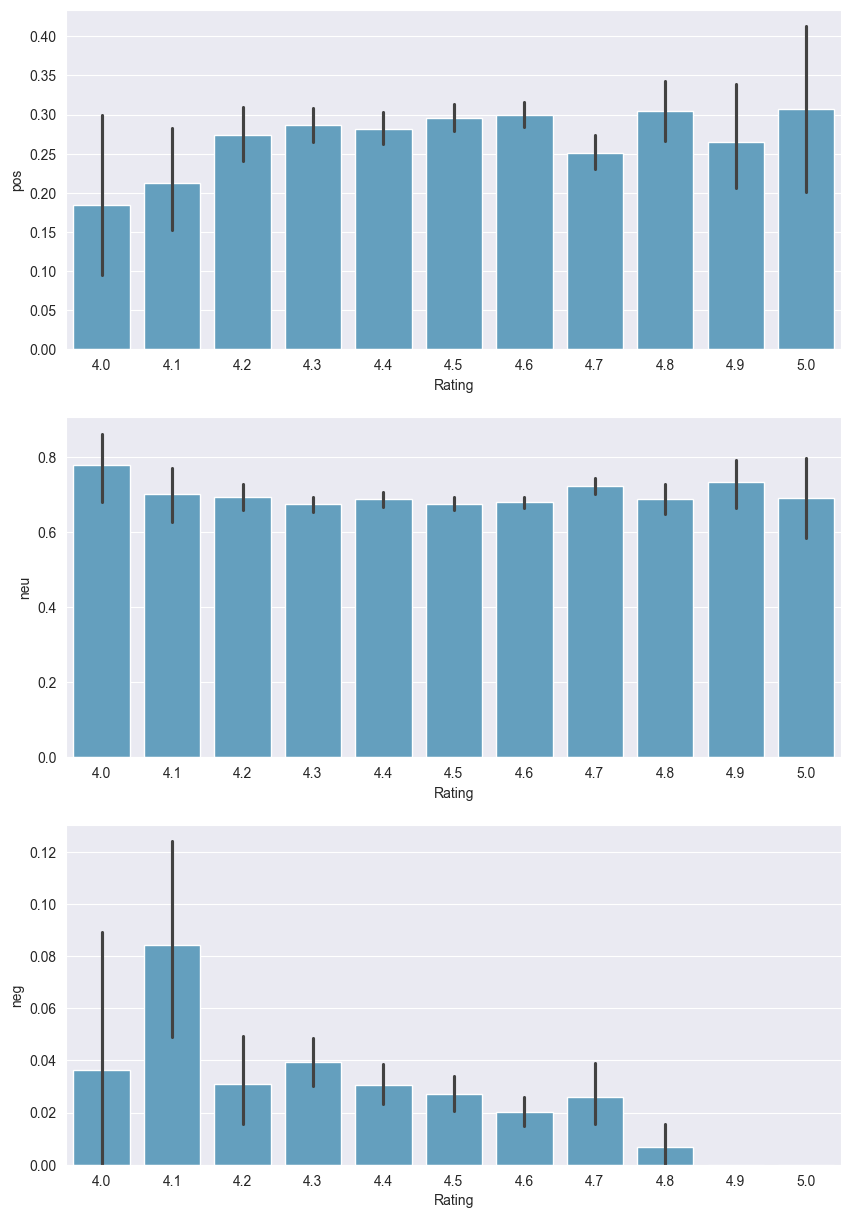

In [13]:
fig , ax = plt.subplots( 3 ,1 , figsize = ( 10 , 15 ) )
sns.barplot( data = df4 , x = 'Rating' , y = 'pos' , ax = ax[0] )
sns.barplot( data = df4 , x = 'Rating' , y = 'neu' , ax = ax[1] )
sns.barplot( data = df4 , x = 'Rating' , y = 'neg' , ax = ax[2] )

plt.show

The plots reveal that as the rating increases, the frequency of positive words used in the review titles rises, while the occurrence of negative words decreases.

In [14]:
 # Statistical Description on Sentimental Score
sentimental_score = df4[[ 'pos' , 'neu' , 'neg' , 'compound' ]]
sentimental_score.describe().T

,count,mean,std,min,25%,50%,75%,max
pos,1009.0,0.285055,0.131638,0.0000,0.1930,0.2810,0.3730,0.7400
neu,1009.0,0.686734,0.127721,0.2600,0.5940,0.6880,0.7700,1.0000
neg,1009.0,0.028215,0.054190,0.0000,0.0000,0.0000,0.0440,0.2880
compound,1009.0,0.696962,0.345695,-0.8456,0.6219,0.8346,0.9095,0.9912


We conclude that the majority of reviews provided by customers are predominantly neutral in tone, with an average compound sentiment score of approximately 70%

In [15]:
 # Saving the cleaned DataFrame
df4.to_csv( 'Amazon Cleaned Data.csv' )